# Library

In [1]:
# Library to dataset
import os
import zipfile
import numpy as np
import pandas as pd

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Others
import shutil
import random

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score

# Dataset

In [2]:
# Load dataset
print("==========================Training Data====================")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/Peach/train",
    label_mode="categorical",
    class_names=['Peach___Bacterial_spot','Peach___healthy'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)
print("==========================Validation Data====================")
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset/Peach/valid",
    label_mode="categorical",
    class_names=['Peach___Bacterial_spot','Peach___healthy'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=False,
    seed=123
)

==========================Training Data====================
Found 3566 files belonging to 2 classes.
==========================Validation Data====================
Found 891 files belonging to 2 classes.


In [3]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/256.)
test_datagen  = ImageDataGenerator(rescale = 1.0/256.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory("Dataset/Peach/train",
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory("Dataset/Peach/valid",
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224),
                                                         shuffle=False)

Found 3566 images belonging to 2 classes.
Found 891 images belonging to 2 classes.


# Model Non Augmented Evaluating

## Model Dense121 Version 1 Peach Non Augmented

In [4]:
# Load model
Dense_Non_Aug1 = tf.keras.models.load_model('Modelling/Peach/Non Augmented/Saved Model/Peach_DenseNet_model1_Based_Non_Augmented')

In [5]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Non_Aug1 = Dense_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Non_Aug1[0]*100))

==========================Evaluate Model====================
45/45 [==============================] - 10s 74ms/step - loss: 9.4178e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.094178%


==========================Confusion Matrix====================
45/45 [==============================] - 4s 47ms/step


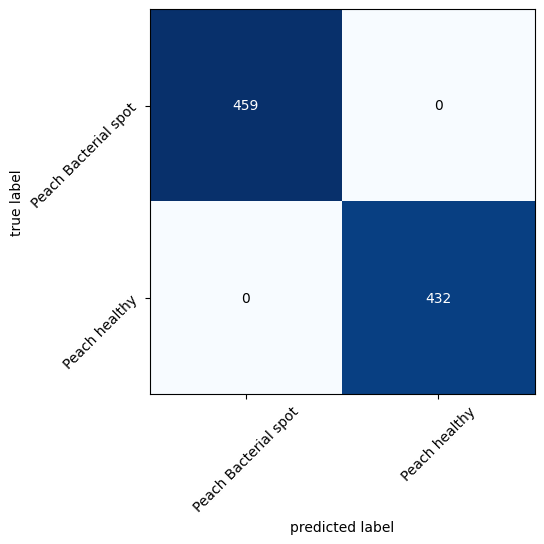

==========================Classification Report====================
Classification Report
                      precision    recall  f1-score   support

Peach Bacterial spot       1.00      1.00      1.00       459
       Peach healthy       1.00      1.00      1.00       432

            accuracy                           1.00       891
           macro avg       1.00      1.00      1.00       891
        weighted avg       1.00      1.00      1.00       891

==========================F1 Score====================
F1 Score :  1.0


In [6]:
# Confusion Matrix and Classification Report
target_names = ['Peach Bacterial spot','Peach healthy']
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Peach_dense_non_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Peach_dense_non_aug1)

## Model Dense121 Version 2 Peach Non Augmented

In [7]:
# Load model
Dense_Non_Aug2 = tf.keras.models.load_model('Modelling/Peach/Non Augmented/Saved Model/Peach_DenseNet_model2_Based_Non_Augmented')

In [8]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Non_Aug2 = Dense_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Non_Aug2[0]*100))

==========================Evaluate Model====================
45/45 [==============================] - 4s 49ms/step - loss: 0.0012 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.120064%


==========================Confusion Matrix====================
45/45 [==============================] - 4s 46ms/step


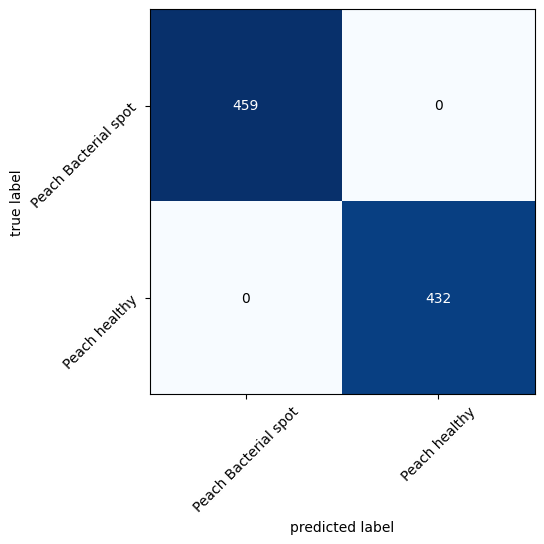

==========================Classification Report====================
Classification Report
                      precision    recall  f1-score   support

Peach Bacterial spot       1.00      1.00      1.00       459
       Peach healthy       1.00      1.00      1.00       432

            accuracy                           1.00       891
           macro avg       1.00      1.00      1.00       891
        weighted avg       1.00      1.00      1.00       891

==========================F1 Score====================
F1 Score :  1.0


In [9]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Peach_dense_non_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Peach_dense_non_aug2)

## MobileNet V2 Version 1 Peach Non Augmented

In [10]:
# Load model
Mobile_Non_Aug1 = tf.keras.models.load_model('Modelling/Peach/Non Augmented/Saved Model/Peach_MobileNetV2_model1_Based_Non_Augmented')

In [11]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Non_Aug1 = Mobile_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Non_Aug1[0]*100))

==========================Evaluate Model====================
45/45 [==============================] - 2s 29ms/step - loss: 0.0020 - accuracy: 0.9989
Accuracy: 99.887764%
Loss: 0.197791%


==========================Confusion Matrix====================
45/45 [==============================] - 2s 23ms/step


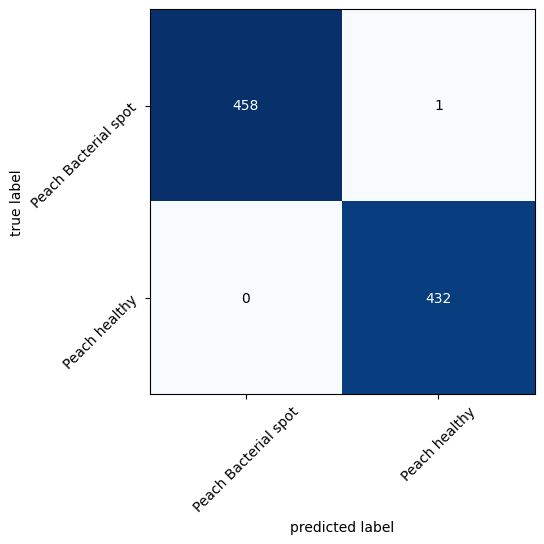

==========================Classification Report====================
Classification Report
                      precision    recall  f1-score   support

Peach Bacterial spot       1.00      1.00      1.00       459
       Peach healthy       1.00      1.00      1.00       432

            accuracy                           1.00       891
           macro avg       1.00      1.00      1.00       891
        weighted avg       1.00      1.00      1.00       891

==========================F1 Score====================
F1 Score :  0.998876709047472


In [12]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Peach_mobile_non_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Peach_mobile_non_aug1)

## MobileNet V2 Version 2 Peach Non Augmented

In [13]:
# Load model
Mobile_Non_Aug2 = tf.keras.models.load_model('Modelling/Peach/Non Augmented/Saved Model/Peach_MobileNetV2_model2_Based_Non_Augmented')

In [14]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Non_Aug2 = Mobile_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Non_Aug2[0]*100))

==========================Evaluate Model====================
45/45 [==============================] - 2s 23ms/step - loss: 0.0028 - accuracy: 0.9989
Accuracy: 99.887764%
Loss: 0.277121%


==========================Confusion Matrix====================
45/45 [==============================] - 2s 23ms/step


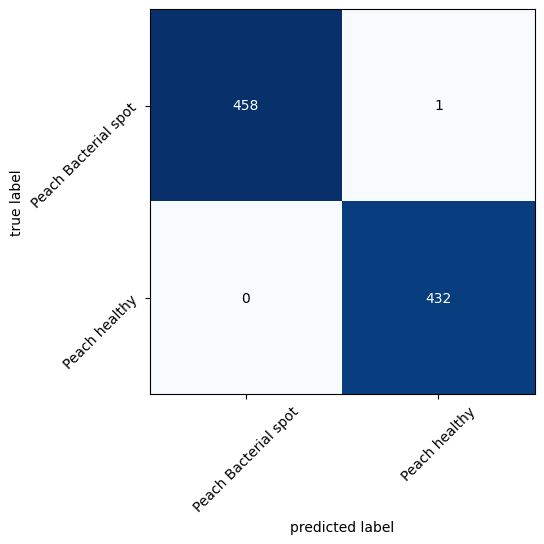

==========================Classification Report====================
Classification Report
                      precision    recall  f1-score   support

Peach Bacterial spot       1.00      1.00      1.00       459
       Peach healthy       1.00      1.00      1.00       432

            accuracy                           1.00       891
           macro avg       1.00      1.00      1.00       891
        weighted avg       1.00      1.00      1.00       891

==========================F1 Score====================
F1 Score :  0.998876709047472


In [15]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Peach_mobile_non_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Peach_mobile_non_aug2)

## DIY Version 1 Peach Non Augmented

In [16]:
# Load model
DIY_Non_Aug1 = tf.keras.models.load_model('Modelling/Peach/Non Augmented/Saved Model/Peach_DIY_model1_Based_Non_Augmented')

In [17]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Non_Aug1 = DIY_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Non_Aug1[0]*100))

==========================Evaluate Model====================
45/45 [==============================] - 1s 24ms/step - loss: 0.1278 - accuracy: 0.9809
Accuracy: 98.092031%
Loss: 12.781942%


==========================Confusion Matrix====================
45/45 [==============================] - 1s 22ms/step


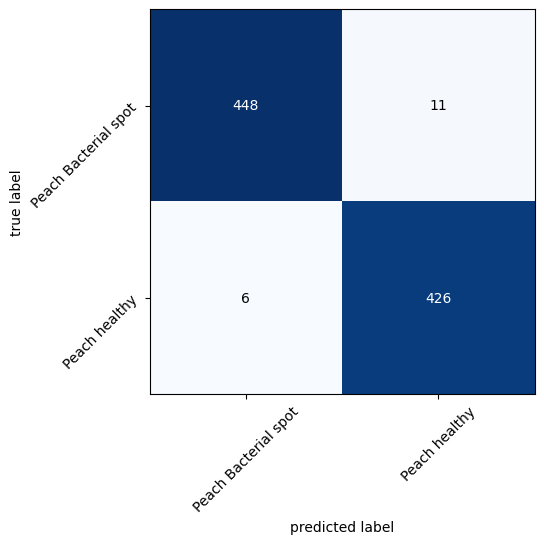

==========================Classification Report====================
Classification Report
                      precision    recall  f1-score   support

Peach Bacterial spot       0.99      0.98      0.98       459
       Peach healthy       0.97      0.99      0.98       432

            accuracy                           0.98       891
           macro avg       0.98      0.98      0.98       891
        weighted avg       0.98      0.98      0.98       891

==========================F1 Score====================
F1 Score :  0.9809086749760838


In [18]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Peach_diy_non_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Peach_diy_non_aug1)

## DIY Version 2 Peach Non Augmented

In [19]:
# Load model
DIY_Non_Aug2 = tf.keras.models.load_model('Modelling/Peach/Non Augmented/Saved Model/Peach_DIY_model2_Based_Non_Augmented')

In [20]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Non_Aug2 = DIY_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Non_Aug2[0]*100))

==========================Evaluate Model====================
45/45 [==============================] - 1s 22ms/step - loss: 0.1386 - accuracy: 0.9832
Accuracy: 98.316497%
Loss: 13.861917%


==========================Confusion Matrix====================
45/45 [==============================] - 1s 21ms/step


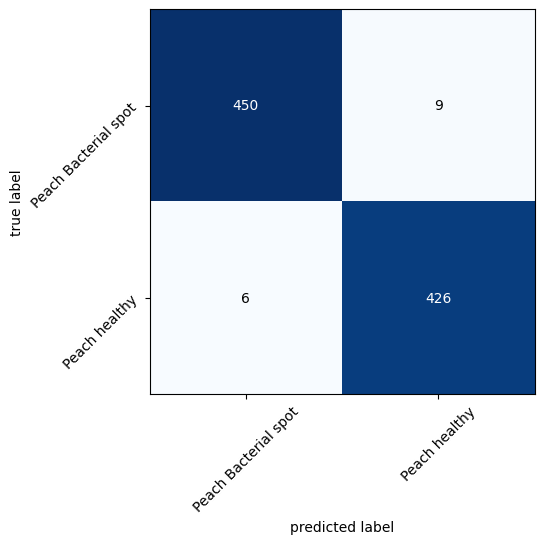

==========================Classification Report====================
Classification Report
                      precision    recall  f1-score   support

Peach Bacterial spot       0.99      0.98      0.98       459
       Peach healthy       0.98      0.99      0.98       432

            accuracy                           0.98       891
           macro avg       0.98      0.98      0.98       891
        weighted avg       0.98      0.98      0.98       891

==========================F1 Score====================
F1 Score :  0.9831527596573827


In [21]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Peach_diy_non_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Peach_diy_non_aug2)

## Xception Version 1 Peach Non Augmented

In [22]:
# Load model
Xception_Non_Aug1 = tf.keras.models.load_model("Modelling/Peach/Non Augmented/Saved Model/Peach_Xception_model1_Based_Non_Augmented.h5", compile=False)
Xception_Non_Aug1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Non_Aug1 = Xception_Non_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Non_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Non_Aug1[0]*100))

==========================Evaluate Model====================
45/45 [==============================] - 4s 61ms/step - loss: 0.0016 - accuracy: 0.9989
Accuracy: 99.887764%
Loss: 0.159507%


==========================Confusion Matrix====================
45/45 [==============================] - 3s 52ms/step


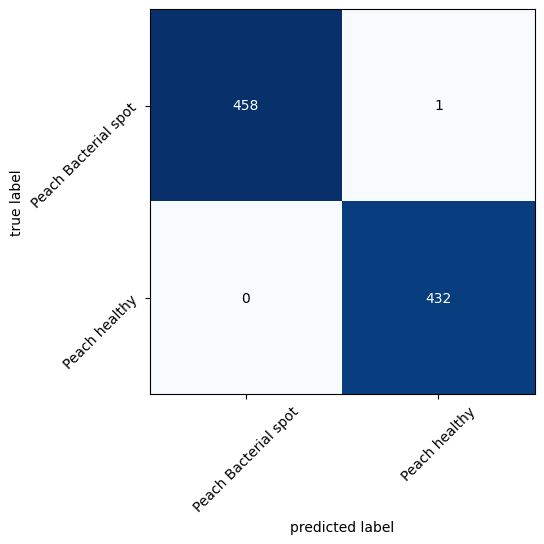

==========================Classification Report====================
Classification Report
                      precision    recall  f1-score   support

Peach Bacterial spot       1.00      1.00      1.00       459
       Peach healthy       1.00      1.00      1.00       432

            accuracy                           1.00       891
           macro avg       1.00      1.00      1.00       891
        weighted avg       1.00      1.00      1.00       891

==========================F1 Score====================
F1 Score :  0.998876709047472


In [24]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Non_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Peach_xception_non_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Peach_xception_non_aug1)

## Xception Version 2 Peach Non Augmented

In [25]:
# Load model
Xception_Non_Aug2 = tf.keras.models.load_model("Modelling/Peach/Non Augmented/Saved Model/Peach_Xception_model2_Based_Non_Augmented.h5", compile=False)
Xception_Non_Aug2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Non_Aug2 = Xception_Non_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Non_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Non_Aug2[0]*100))

==========================Evaluate Model====================
45/45 [==============================] - 4s 56ms/step - loss: 0.0041 - accuracy: 0.9989
Accuracy: 99.887764%
Loss: 0.405878%


==========================Confusion Matrix====================
45/45 [==============================] - 3s 52ms/step


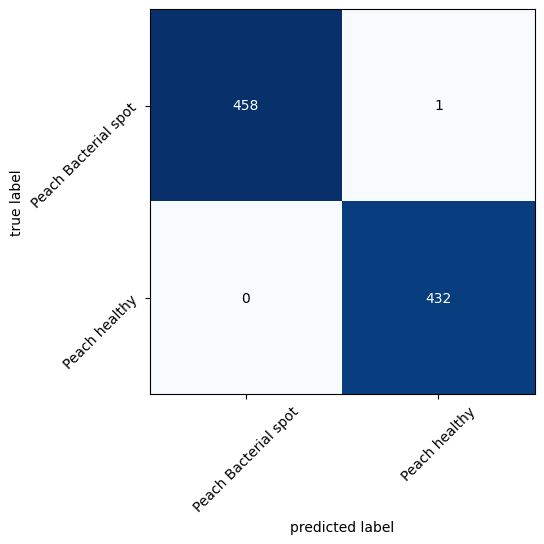

==========================Classification Report====================
Classification Report
                      precision    recall  f1-score   support

Peach Bacterial spot       1.00      1.00      1.00       459
       Peach healthy       1.00      1.00      1.00       432

            accuracy                           1.00       891
           macro avg       1.00      1.00      1.00       891
        weighted avg       1.00      1.00      1.00       891

==========================F1 Score====================
F1 Score :  0.998876709047472


In [27]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Non_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Peach_xception_non_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Peach_xception_non_aug2)

# Model Augmented Evaluating

## Model Dense121 Version 1 Peach Augmented

In [28]:
# Load model
Dense_Aug1 = tf.keras.models.load_model('Modelling/Peach/Augmented/Saved Model/Peach_DenseNet_model1_Based_Augmented')

In [29]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Aug1 = Dense_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Aug1[0]*100))

==========================Evaluate Model====================
45/45 [==============================] - 4s 50ms/step - loss: 0.0042 - accuracy: 0.9989
Accuracy: 99.887764%
Loss: 0.417683%


==========================Confusion Matrix====================
45/45 [==============================] - 4s 45ms/step


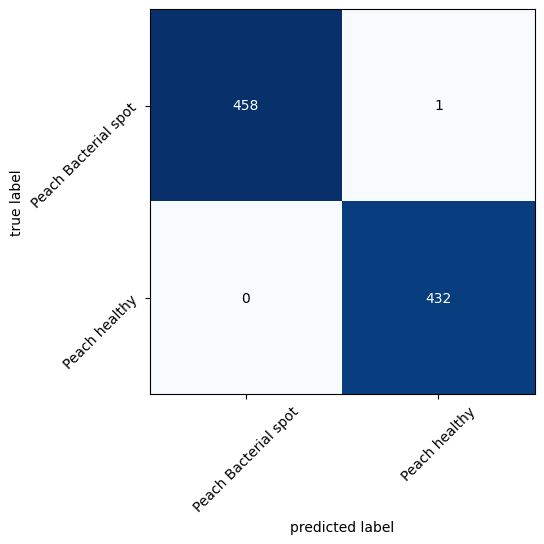

==========================Classification Report====================
Classification Report
                      precision    recall  f1-score   support

Peach Bacterial spot       1.00      1.00      1.00       459
       Peach healthy       1.00      1.00      1.00       432

            accuracy                           1.00       891
           macro avg       1.00      1.00      1.00       891
        weighted avg       1.00      1.00      1.00       891

==========================F1 Score====================
F1 Score :  0.998876709047472


In [30]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Peach_dense_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Peach_dense_aug1)

## Model Dense121 Version 2 Peach Augmented

In [31]:
# Load model
Dense_Aug2 = tf.keras.models.load_model('Modelling/Peach/Augmented/Saved Model/Peach_DenseNet_model2_Based_Augmented')

In [32]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Dense_Aug2 = Dense_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Dense_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Dense_Aug2[0]*100))

==========================Evaluate Model====================
45/45 [==============================] - 4s 50ms/step - loss: 9.9020e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.099020%


==========================Confusion Matrix====================
45/45 [==============================] - 4s 46ms/step


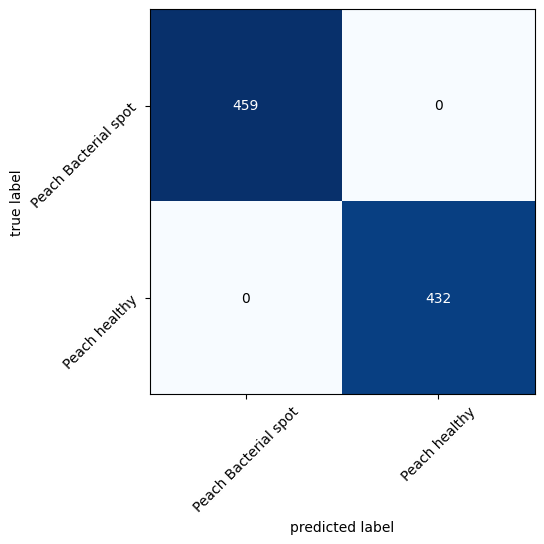

==========================Classification Report====================
Classification Report
                      precision    recall  f1-score   support

Peach Bacterial spot       1.00      1.00      1.00       459
       Peach healthy       1.00      1.00      1.00       432

            accuracy                           1.00       891
           macro avg       1.00      1.00      1.00       891
        weighted avg       1.00      1.00      1.00       891

==========================F1 Score====================
F1 Score :  1.0


In [33]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Dense_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Peach_dense_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Peach_dense_aug2)

## MobileNet V2 Version 1 Peach Augmented

In [34]:
# Load model
Mobile_Aug1 = tf.keras.models.load_model('Modelling/Peach/Augmented/Saved Model/Peach_MobileNetV2_model1_Based_Augmented')

In [35]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Aug1 = Mobile_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Aug1[0]*100))

==========================Evaluate Model====================
45/45 [==============================] - 2s 24ms/step - loss: 0.0020 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.196944%


==========================Confusion Matrix====================
45/45 [==============================] - 2s 24ms/step


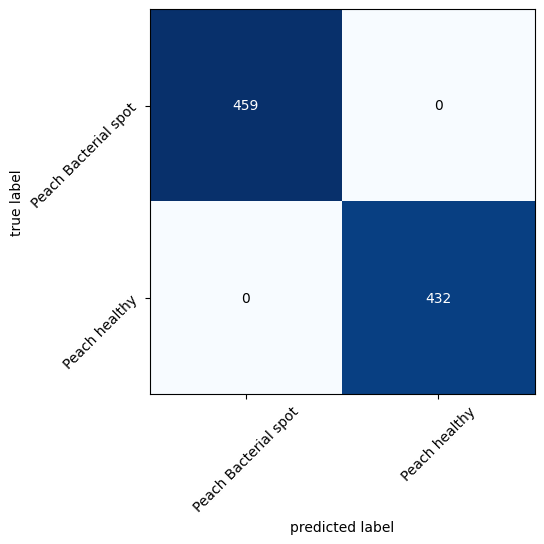

==========================Classification Report====================
Classification Report
                      precision    recall  f1-score   support

Peach Bacterial spot       1.00      1.00      1.00       459
       Peach healthy       1.00      1.00      1.00       432

            accuracy                           1.00       891
           macro avg       1.00      1.00      1.00       891
        weighted avg       1.00      1.00      1.00       891

==========================F1 Score====================
F1 Score :  1.0


In [36]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Peach_mobile_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Peach_mobile_aug1)

## MobileNet V2 Version 2 Peach Augmented

In [37]:
# Load model
Mobile_Aug2 = tf.keras.models.load_model('Modelling/Peach/Augmented/Saved Model/Peach_MobileNetV2_model2_Based_Augmented')

In [38]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Mobile_Aug2 = Mobile_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Mobile_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Mobile_Aug2[0]*100))

==========================Evaluate Model====================
45/45 [==============================] - 2s 24ms/step - loss: 3.6875e-04 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.036875%


==========================Confusion Matrix====================
45/45 [==============================] - 2s 22ms/step


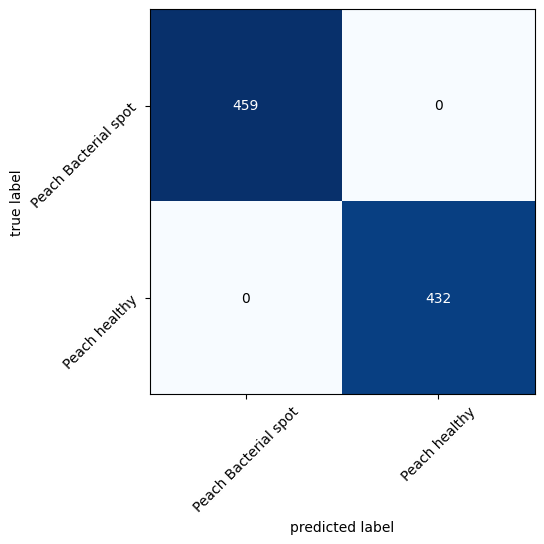

==========================Classification Report====================
Classification Report
                      precision    recall  f1-score   support

Peach Bacterial spot       1.00      1.00      1.00       459
       Peach healthy       1.00      1.00      1.00       432

            accuracy                           1.00       891
           macro avg       1.00      1.00      1.00       891
        weighted avg       1.00      1.00      1.00       891

==========================F1 Score====================
F1 Score :  1.0


In [39]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Mobile_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Peach_mobile_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Peach_mobile_aug2)

## Xception Version 1 Peach Augmented

In [40]:
# Load model
Xception_Aug1 = tf.keras.models.load_model("Modelling/Peach/Augmented/Saved Model/Peach_Xception_model1_Based_Augmented.h5", compile=False)
Xception_Aug1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Aug1 = Xception_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Aug1[0]*100))

==========================Evaluate Model====================
45/45 [==============================] - 3s 55ms/step - loss: 0.0023 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.229399%


==========================Confusion Matrix====================
45/45 [==============================] - 3s 53ms/step


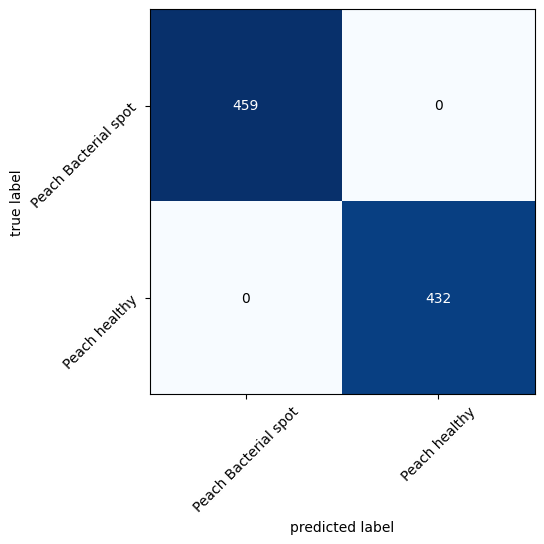

==========================Classification Report====================
Classification Report
                      precision    recall  f1-score   support

Peach Bacterial spot       1.00      1.00      1.00       459
       Peach healthy       1.00      1.00      1.00       432

            accuracy                           1.00       891
           macro avg       1.00      1.00      1.00       891
        weighted avg       1.00      1.00      1.00       891

==========================F1 Score====================
F1 Score :  1.0


In [42]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Peach_Xception_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Peach_Xception_aug1)

## Xception Version 2 Peach Augmented

In [43]:
# Load model
Xception_Aug2 = tf.keras.models.load_model("Modelling/Peach/Augmented/Saved Model/Peach_Xception_model2_Based_Augmented.h5", compile=False)
Xception_Aug2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
# evaluate model
print("==========================Evaluate Model====================")
scores_Xception_Aug2 = Xception_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_Xception_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_Xception_Aug2[0]*100))

==========================Evaluate Model====================
45/45 [==============================] - 4s 55ms/step - loss: 0.0012 - accuracy: 1.0000
Accuracy: 100.000000%
Loss: 0.116673%


==========================Confusion Matrix====================
45/45 [==============================] - 3s 53ms/step


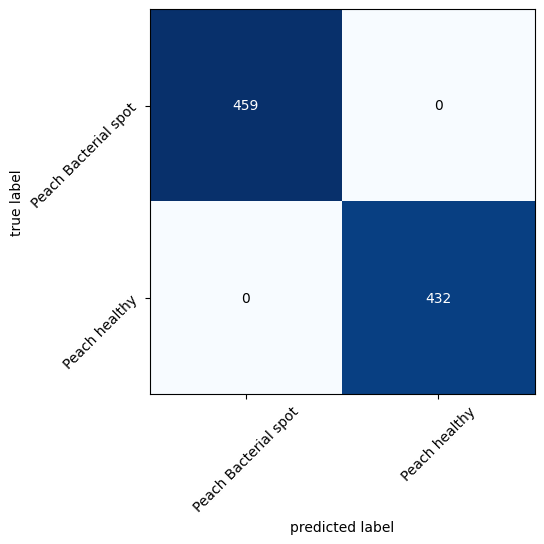

==========================Classification Report====================
Classification Report
                      precision    recall  f1-score   support

Peach Bacterial spot       1.00      1.00      1.00       459
       Peach healthy       1.00      1.00      1.00       432

            accuracy                           1.00       891
           macro avg       1.00      1.00      1.00       891
        weighted avg       1.00      1.00      1.00       891

==========================F1 Score====================
F1 Score :  1.0


In [45]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = Xception_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Peach_Xception_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Peach_Xception_aug2)

## DIY Version 1 Peach Augmented

In [46]:
# Load model
DIY_Aug1 = tf.keras.models.load_model('Modelling/Peach/Augmented/Saved Model/Peach_DIY_model1_Based_Augmented')

In [47]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Aug1 = DIY_Aug1.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Aug1[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Aug1[0]*100))

==========================Evaluate Model====================
45/45 [==============================] - 1s 21ms/step - loss: 0.0334 - accuracy: 0.9944
Accuracy: 99.438834%
Loss: 3.339982%


==========================Confusion Matrix====================
45/45 [==============================] - 1s 22ms/step


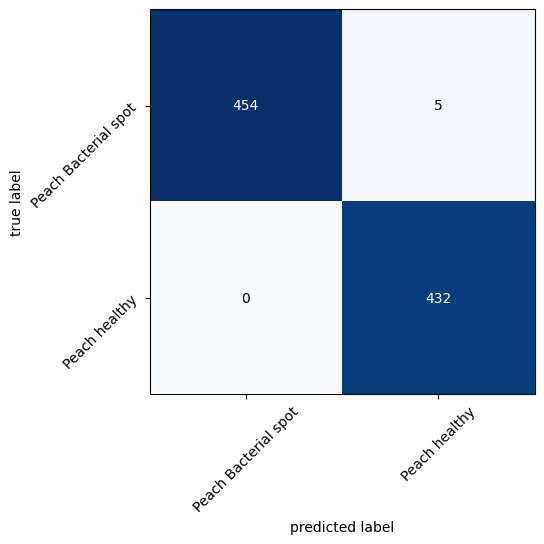

==========================Classification Report====================
Classification Report
                      precision    recall  f1-score   support

Peach Bacterial spot       1.00      0.99      0.99       459
       Peach healthy       0.99      1.00      0.99       432

            accuracy                           0.99       891
           macro avg       0.99      0.99      0.99       891
        weighted avg       0.99      0.99      0.99       891

==========================F1 Score====================
F1 Score :  0.9943849044047306


In [48]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Aug1.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Peach_DIY_aug1 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Peach_DIY_aug1)

## DIY Version 2 Peach Augmented

In [49]:
# Load model
DIY_Aug2 = tf.keras.models.load_model('Modelling/Peach/Augmented/Saved Model/Peach_DIY_model2_Based_Augmented')

In [50]:
# evaluate model
print("==========================Evaluate Model====================")
scores_DIY_Aug2 = DIY_Aug2.evaluate(validation_generator, verbose=1)
print("Accuracy: %.6f%%" % (scores_DIY_Aug2[1]*100))
print("Loss: %.6f%%" % (scores_DIY_Aug2[0]*100))

==========================Evaluate Model====================
45/45 [==============================] - 1s 22ms/step - loss: 0.0215 - accuracy: 0.9978
Accuracy: 99.775535%
Loss: 2.150886%


==========================Confusion Matrix====================
45/45 [==============================] - 1s 23ms/step


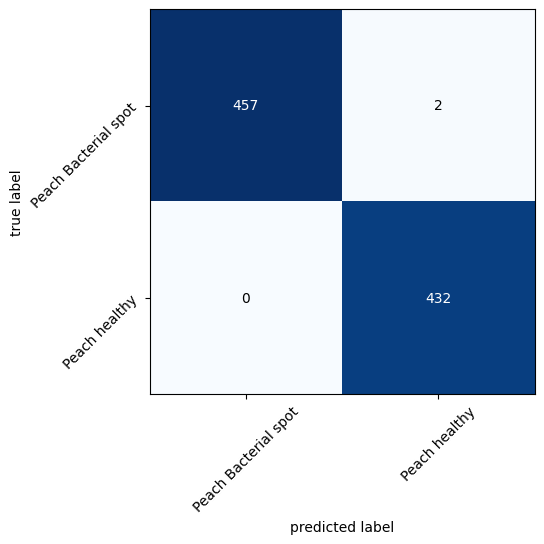

==========================Classification Report====================
Classification Report
                      precision    recall  f1-score   support

Peach Bacterial spot       1.00      1.00      1.00       459
       Peach healthy       1.00      1.00      1.00       432

            accuracy                           1.00       891
           macro avg       1.00      1.00      1.00       891
        weighted avg       1.00      1.00      1.00       891

==========================F1 Score====================
F1 Score :  0.9977535625321459


In [51]:
# Confusion Matrix and Classification Report
# Plot Confusion Matrix
print("==========================Confusion Matrix====================")
y_pred = DIY_Aug2.predict(validation_generator)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
ax.set_xticklabels([''] + target_names, rotation=45)
ax.set_yticklabels([''] + target_names, rotation=45)
plt.show()

print("==========================Classification Report====================")
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

# F1 Score
print("==========================F1 Score====================")
f1_Peach_DIY_aug2 = f1_score(validation_generator.classes, y_pred, average='macro')
print('F1 Score : ', f1_Peach_DIY_aug2)

# Compare All

In [52]:
# Make dictionary of all models
models = {
    "Dense_Non_Aug1": Dense_Non_Aug1,
    "Dense_Non_Aug2": Dense_Non_Aug2,
    "Mobile_Non_Aug1": Mobile_Non_Aug1,
    "Mobile_Non_Aug2": Mobile_Non_Aug2,
    "DIY_Non_Aug1": DIY_Non_Aug1,
    "DIY_Non_Aug2": DIY_Non_Aug2,
    "Xception_Non_Aug1": Xception_Non_Aug1,
    "Xception_Non_Aug2": Xception_Non_Aug2,
    "Dense_Aug1": Dense_Aug1,
    "Dense_Aug2": Dense_Aug2,
    "Mobile_Aug1": Mobile_Aug1,
    "Mobile_Aug2": Mobile_Aug2,
    "Xception_Aug1": Xception_Aug1,
    "Xception_Aug2": Xception_Aug2,
    "DIY_Aug1": DIY_Aug1,
    "DIY_Aug2": DIY_Aug2
}

# Make dictionary of all accuracy scores
accuracy = {
    "Dense_Non_Aug1": scores_Dense_Non_Aug1[1],
    "Dense_Non_Aug2": scores_Dense_Non_Aug2[1],
    "Mobile_Non_Aug1": scores_Mobile_Non_Aug1[1],
    "Mobile_Non_Aug2": scores_Mobile_Non_Aug2[1],
    "DIY_Non_Aug1": scores_DIY_Non_Aug1[1],
    "DIY_Non_Aug2": scores_DIY_Non_Aug2[1],
    "Xception_Non_Aug1": scores_Xception_Non_Aug1[1],
    "Xception_Non_Aug2": scores_Xception_Non_Aug2[1],
    "Dense_Aug1": scores_Dense_Aug1[1],
    "Dense_Aug2": scores_Dense_Aug2[1],
    "Mobile_Aug1": scores_Mobile_Aug1[1],
    "Mobile_Aug2": scores_Mobile_Aug2[1],
    "Xception_Aug1": scores_Xception_Aug1[1],
    "Xception_Aug2": scores_Xception_Aug2[1],
    "DIY_Aug1": scores_DIY_Aug1[1],
    "DIY_Aug2": scores_DIY_Aug2[1]
}

# Make dictionary of all loss scores
loss = {
    "Dense_Non_Aug1": scores_Dense_Non_Aug1[0],
    "Dense_Non_Aug2": scores_Dense_Non_Aug2[0],
    "Mobile_Non_Aug1": scores_Mobile_Non_Aug1[0],
    "Mobile_Non_Aug2": scores_Mobile_Non_Aug2[0],
    "DIY_Non_Aug1": scores_DIY_Non_Aug1[0],
    "DIY_Non_Aug2": scores_DIY_Non_Aug2[0],
    "Xception_Non_Aug1": scores_Xception_Non_Aug1[0],
    "Xception_Non_Aug2": scores_Xception_Non_Aug2[0],
    "Dense_Aug1": scores_Dense_Aug1[0],
    "Dense_Aug2": scores_Dense_Aug2[0],
    "Mobile_Aug1": scores_Mobile_Aug1[0],
    "Mobile_Aug2": scores_Mobile_Aug2[0],
    "Xception_Aug1": scores_Xception_Aug1[0],
    "Xception_Aug2": scores_Xception_Aug2[0],
    "DIY_Aug1": scores_DIY_Aug1[0],
    "DIY_Aug2": scores_DIY_Aug2[0]
}

# f1
f1 = {
    "Dense_Non_Aug1": f1_Peach_dense_non_aug1,
    "Dense_Non_Aug2": f1_Peach_dense_non_aug2,
    "Mobile_Non_Aug1": f1_Peach_mobile_non_aug1,
    "Mobile_Non_Aug2": f1_Peach_mobile_non_aug2,
    "DIY_Non_Aug1": f1_Peach_diy_non_aug1,
    "DIY_Non_Aug2": f1_Peach_diy_non_aug2,
    "Xception_Non_Aug1": f1_Peach_xception_non_aug1,
    "Xception_Non_Aug2": f1_Peach_xception_non_aug2,
    "Dense_Aug1": f1_Peach_dense_aug1,
    "Dense_Aug2": f1_Peach_dense_aug2,
    "Mobile_Aug1": f1_Peach_mobile_aug1,
    "Mobile_Aug2": f1_Peach_mobile_aug2,
    "Xception_Aug1": f1_Peach_Xception_aug1,
    "Xception_Aug2": f1_Peach_Xception_aug2,
    "DIY_Aug1": f1_Peach_DIY_aug1,
    "DIY_Aug2": f1_Peach_DIY_aug2
}

# Make dataframe of all models, accuracy, loss, and f1 score
df = pd.DataFrame(list(zip(models.keys(), accuracy.values(), loss.values(), f1.values())), columns =['Model', 'Accuracy', 'Loss', 'F1'])

# Sort dataframe by accuracy
df = df.sort_values(by=['Accuracy'], ascending=False)

# Print dataframe
print(df)

                Model  Accuracy      Loss        F1
0      Dense_Non_Aug1  1.000000  0.000942  1.000000
1      Dense_Non_Aug2  1.000000  0.001201  1.000000
9          Dense_Aug2  1.000000  0.000990  1.000000
10        Mobile_Aug1  1.000000  0.001969  1.000000
11        Mobile_Aug2  1.000000  0.000369  1.000000
12      Xception_Aug1  1.000000  0.002294  1.000000
13      Xception_Aug2  1.000000  0.001167  1.000000
2     Mobile_Non_Aug1  0.998878  0.001978  0.998877
3     Mobile_Non_Aug2  0.998878  0.002771  0.998877
6   Xception_Non_Aug1  0.998878  0.001595  0.998877
7   Xception_Non_Aug2  0.998878  0.004059  0.998877
8          Dense_Aug1  0.998878  0.004177  0.998877
15           DIY_Aug2  0.997755  0.021509  0.997754
14           DIY_Aug1  0.994388  0.033400  0.994385
5        DIY_Non_Aug2  0.983165  0.138619  0.983153
4        DIY_Non_Aug1  0.980920  0.127819  0.980909


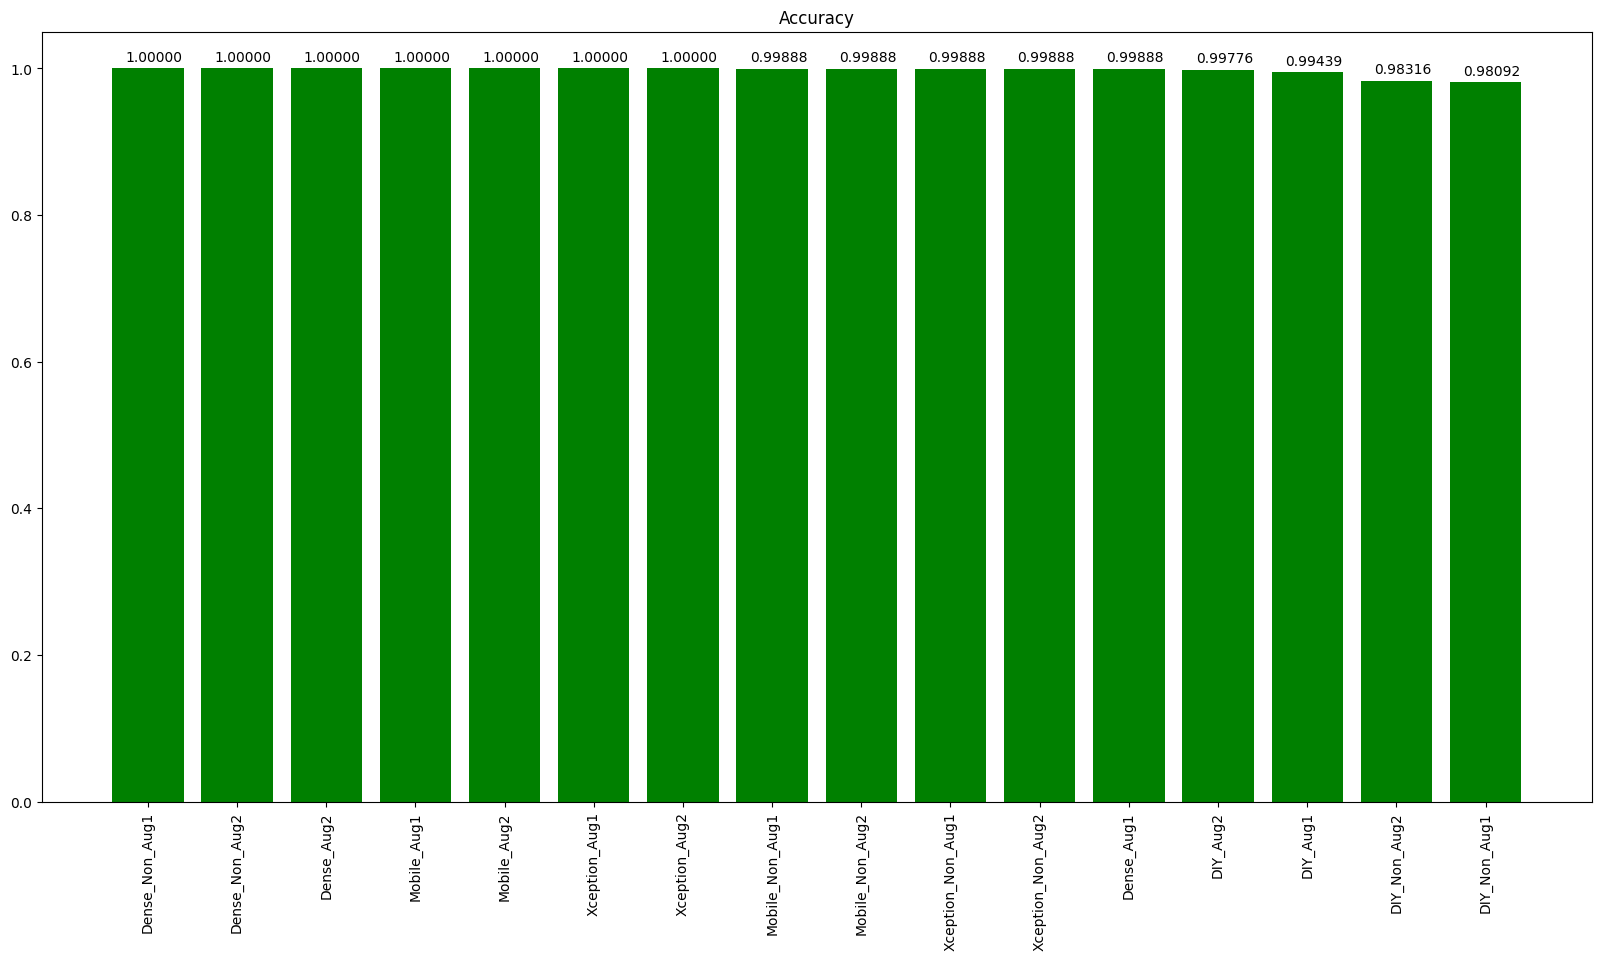

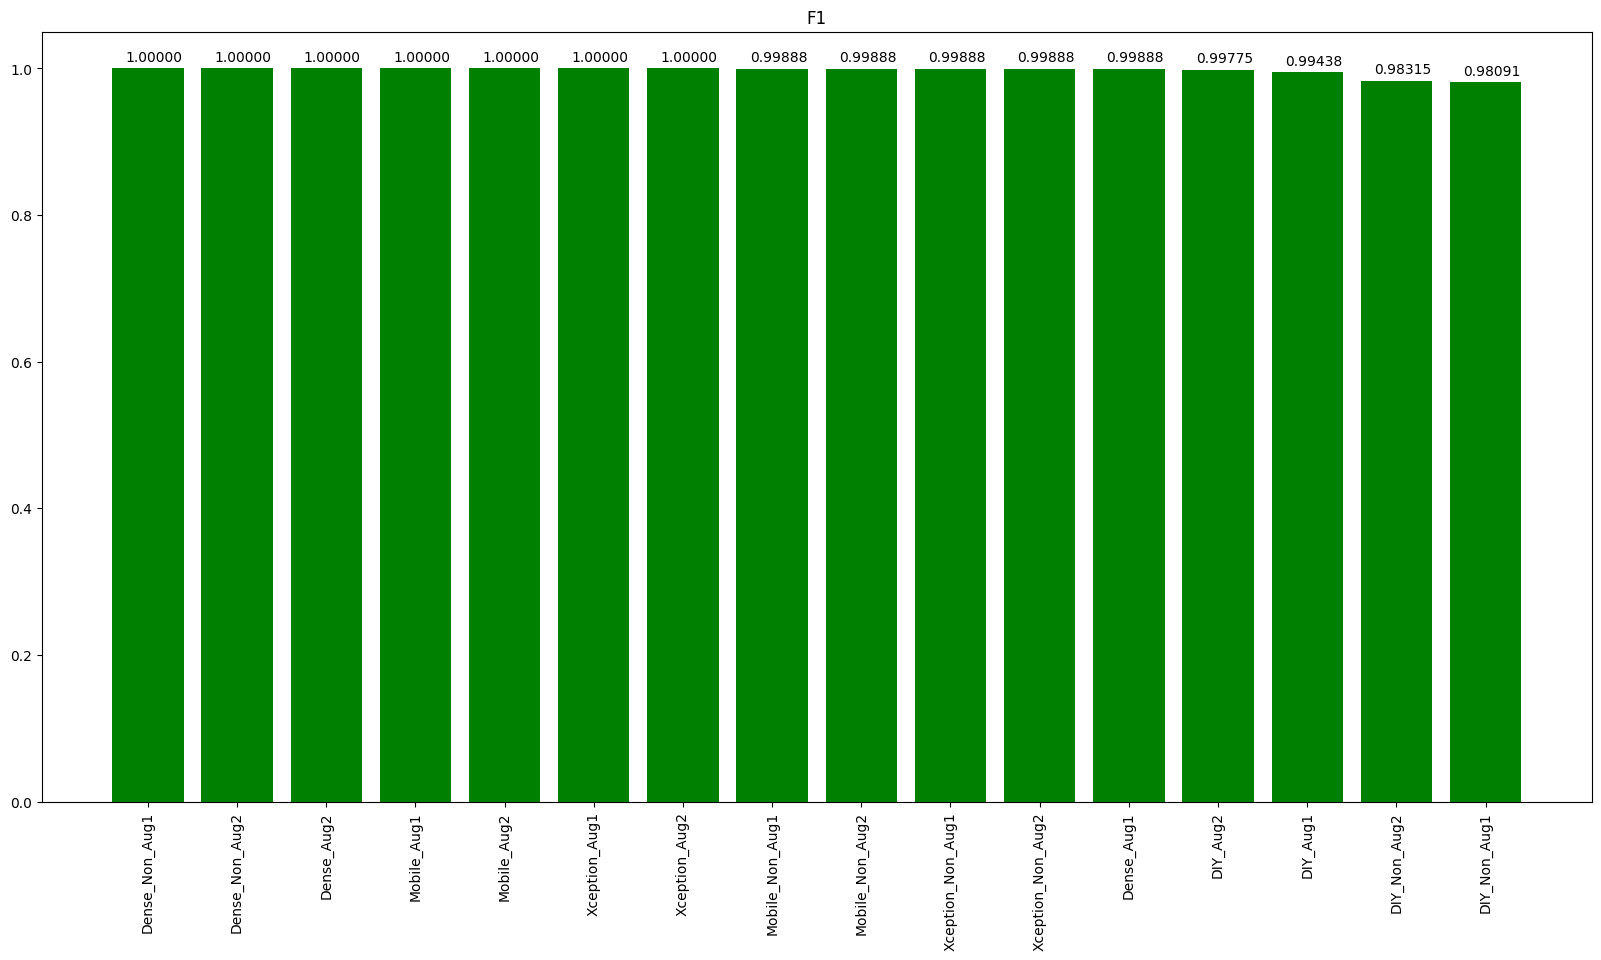

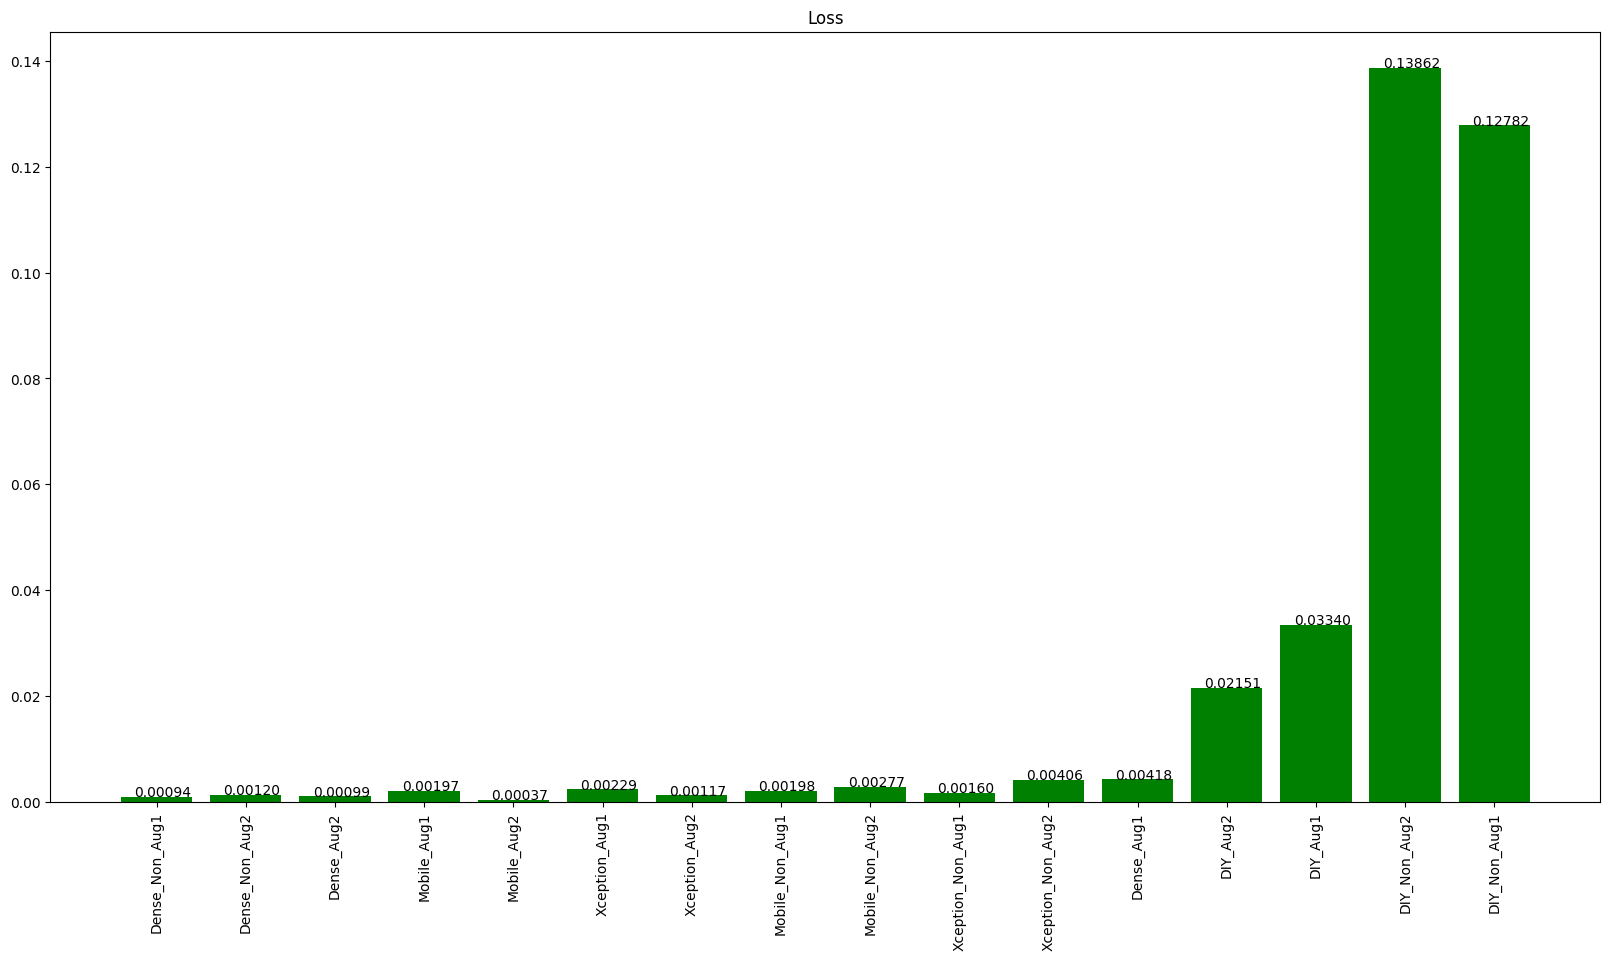

In [53]:
# make multiple plots for accuracy, f1 and loss with annotations
# Accuracy
plt.figure(figsize=(20, 10))
plt.title('Accuracy')
plt.bar(df['Model'], df['Accuracy'], color='green')
plt.xticks(rotation=90)
for i, v in enumerate(df['Accuracy']):
    plt.text(i - 0.25, v + 0.01, '{0:.5f}'.format(v))
plt.show()

# F1
plt.figure(figsize=(20, 10))
plt.title('F1')
plt.bar(df['Model'], df['F1'], color='green')
plt.xticks(rotation=90)
for i, v in enumerate(df['F1']):
    plt.text(i - 0.25, v + 0.01, '{0:.5f}'.format(v))
plt.show()

# Loss
plt.figure(figsize=(20, 10))
plt.title('Loss')
plt.bar(df['Model'], df['Loss'], color='green')
plt.xticks(rotation=90)
for i, v in enumerate(df['Loss']):
    plt.text(i - 0.25, v + 0.0001, '{0:.5f}'.format(v))
plt.show()